<a href="https://colab.research.google.com/github/snehasaran09/Digit-Classsifcation-using-CNN-/blob/main/Project1_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dataset 

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 

In [ ]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape
x_test.shape

(10000, 28, 28)

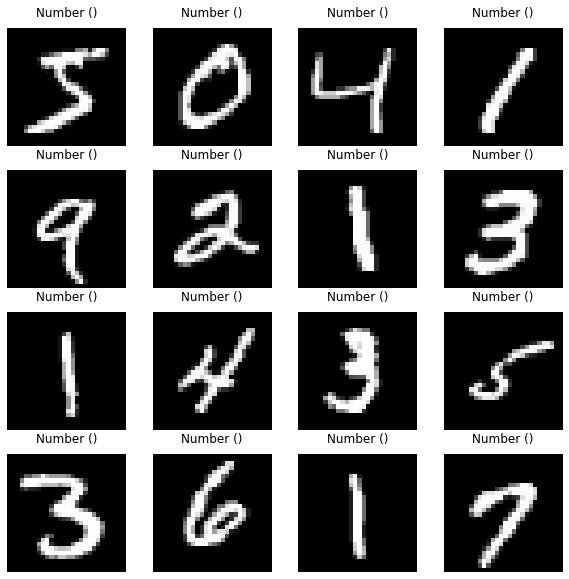

In [ ]:
fig , axs = plt.subplots(4,4, figsize = (10,10))
plt.gray()
for i , axes in enumerate(axs.flat):
  axes.matshow(x_train[i])
  axes.axis("off")
  axes.set_title('Number ()'.format(y_train[i]))
fig.show()

Pre-processing the data

Pre-Processing Data

Number:  5


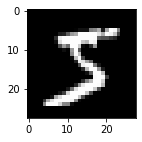

Number:  0


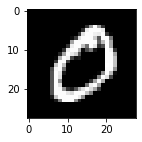

Number:  4


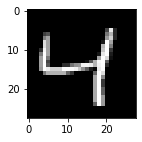

Number:  1


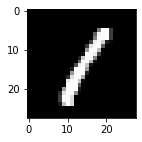

Number:  9


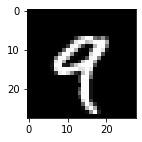

In [ ]:
for i in range(0,5):
  plt.subplots(figsize=(2,2))
  img = x_train[i]
  print("Number: ", y_train[i])
  plt.imshow(img)
  plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)

In [ ]:
print(x_train[i])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape: ',x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape:  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Using Inbuilt Tensorflow Modules To Work With Convolutional Neural Networks

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2019 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0827 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0590 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0432 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0356 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0286 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0249 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0214 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0180 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0672 - accuracy: 0.9853


[0.06722205132246017, 0.9853000044822693]